<a href="https://colab.research.google.com/github/Ms-Gichuhi/Clicks-on-Ads-analysis-sing-R/blob/main/Copy_of_WEEK12_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Research Question

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 

##Metric of success

determine the persons who are more likely to click ads

## Experimental design
Loading and reading data.

Find and deal with outliers, anomalies, and missing data within the dataset.
Perform  univariate and bivariate analysis.

From the insights provide a conclusion and recommendation.

In [67]:
install.packages("data.table")
require(data.table)
# Importing our database
# ---
# install package data.table to work with data tables
library(data.table) # load package
install.packages("tidyverse") # install packages to work with data frame - extends into visualization
library(tidyverse) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [68]:
# Reading our dataset
# ---
# 
adverts <- fread('advertising (1).csv')

In [69]:
#previewing the top of the dataframe
head(adverts)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [70]:
#previewing the bottom of our dataset
tail(adverts)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


##Data cleaning

In [71]:
#checking for missing values
colSums(is.na(adverts))

#there are no missing values in our dataset

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

In [72]:
#checking for duplicates
duplicates <- duplicated(adverts)

head(duplicates)

#we do not have any duplicates in the dataset

[1] FALSE FALSE FALSE FALSE FALSE FALSE

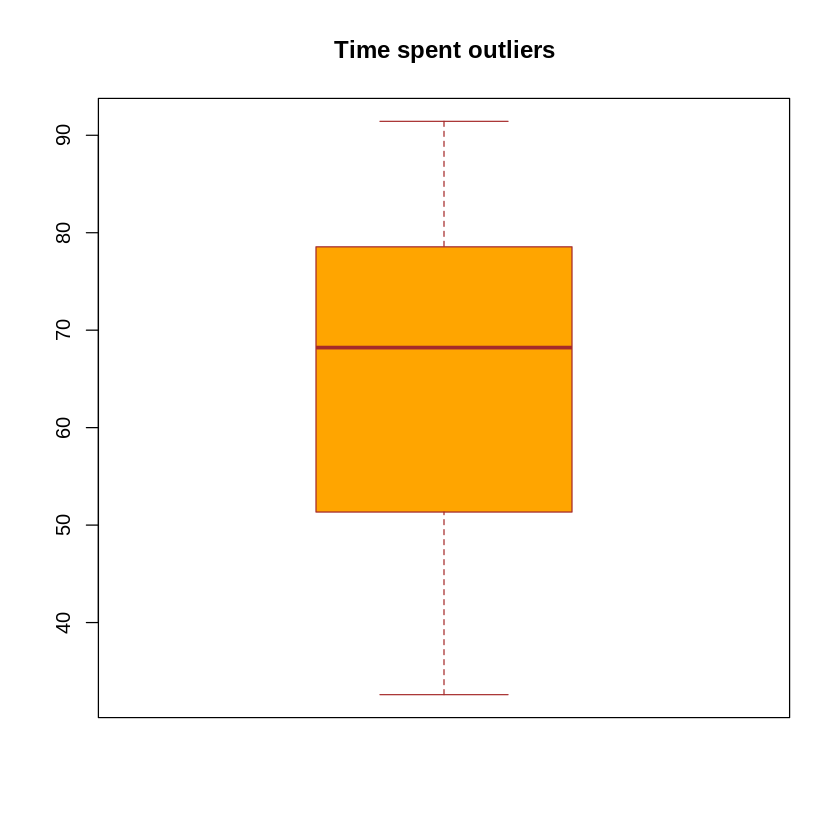

In [73]:
boxplot(adverts[['Daily Time Spent on Site']],
main = "Time spent outliers",
col = "orange",
border = "brown",
horizontal = FALSE
)


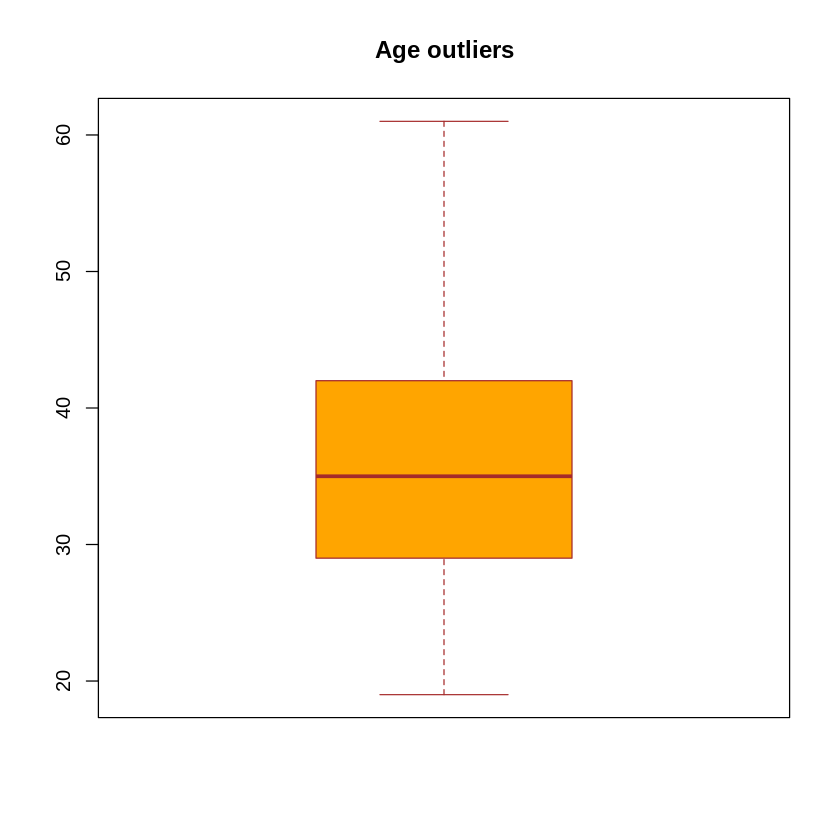

In [74]:
boxplot(adverts[['Age']],
main = "Age outliers",
col = "orange",
border = "brown",
horizontal = FALSE
)

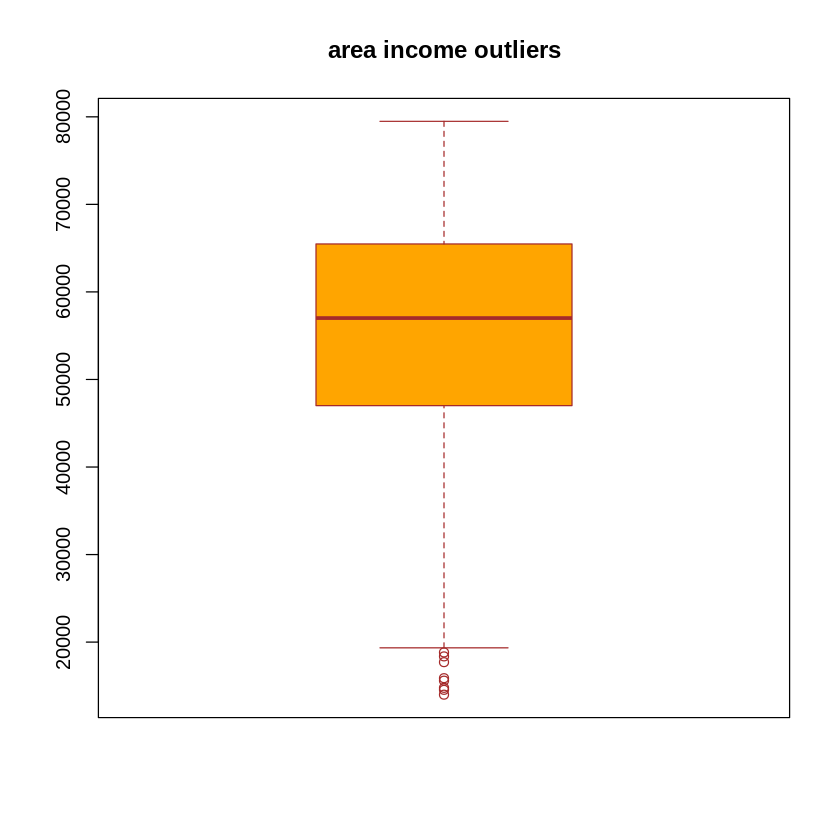

In [75]:
boxplot(adverts[['Area Income']],
main = "area income outliers",
col = "orange",
border = "brown",
horizontal = FALSE
)

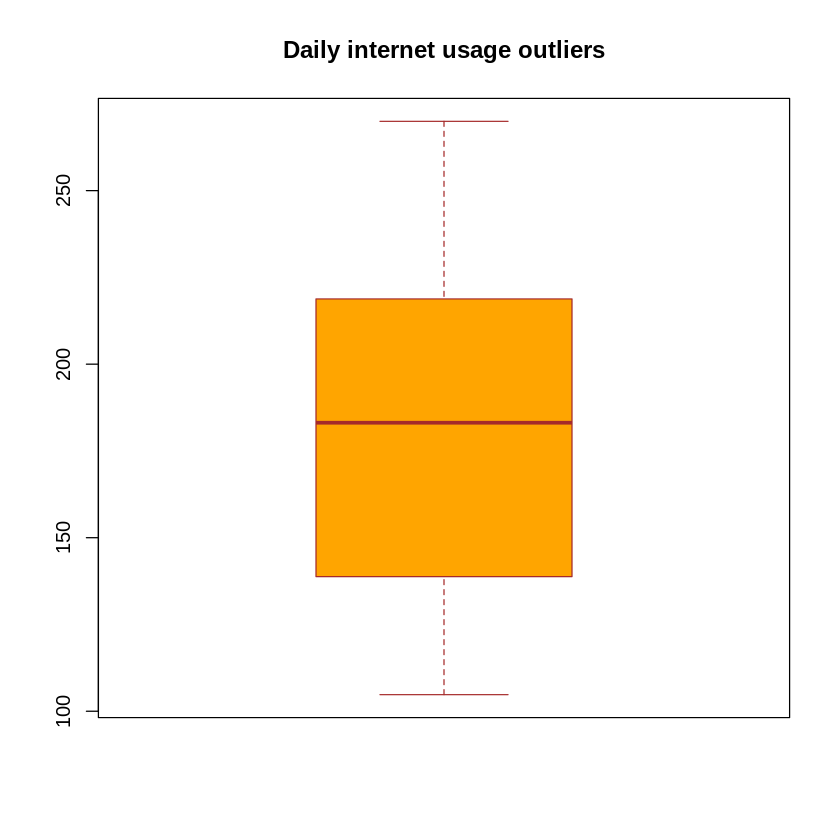

In [76]:
boxplot(adverts[['Daily Internet Usage']],
main = "Daily internet usage outliers",
col = "orange",
border = "brown",
horizontal = FALSE
)

there are no major outliers in our dataset that would affect our analysis. we therefore leave the insignificant outliers in the area income untouched.

# EDA

In [77]:
# Create a data object, “renamed”. Use the “adverts” object and rename “Area_income” from “Area Income”.
#renamed <- adverts %>%
 # rename("Area_income" = "Area Income")

In [78]:
#checking the datatypes of columns
class(adverts[['Daily Time Spent on Site']])
class(adverts[['Daily Internet Usage']])
class(adverts[['Area Income']])
class(adverts[['Age']])


[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "integer"

In [79]:
head(adverts)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0




> Univariate Analysis





> mean



In [80]:
adverts[['Area Income']]

[1] 61833.90 68441.85 59785.94 54806.18 73889.99 59761.56 53852.85 24593.33
   [9] 68862.00 55642.32 45632.51 62491.01 51636.92 51739.63 30976.00 52182.23
  [17] 23936.86 71511.08 31087.54 23821.72 64802.33 60015.57 32635.70 61628.72
  [25] 68962.32 64828.00 38067.08 58295.82 32708.94 46179.97 51473.28 45593.93
  [33] 25583.29 30227.98 45580.92 61389.50 56770.79 76435.30 57425.87 27508.41
  [41] 57691.95 59784.18 66572.39 64929.61 57519.64 53575.48 50983.75 67058.72
  [49] 52723.34 54286.10 61526.25 58526.04 53350.11 62657.53 62722.57 67479.62
  [57] 75254.88 52336.64 56113.37 24852.90 47708.42 64654.66 71228.44 61601.05
  [65] 66281.46 73910.90 51317.33 51510.18 61005.87 32536.98 60248.97 74543.81
  [73] 75509.61 42650.32 58183.04 60465.72 57009.76 54541.56 32689.04 55605.92
  [81] 63296.87 65653.47 61652.53 30726.26 74535.94 47861.93 73600.28 58543.94
  [89] 42696.67 37334.78 71392.53 59550.05 64264.25 64147.86 25686.34 52968.22
  [97] 22473.08 64927.19 51868.85 69456.83 31947.65 51864.77 59593.56 48376.14
 [105] 56884.74 67186.54 46557.92 66541.05 33258.09 72272.90 60333.38 65229.13
 [113] 56067.38 37838.72 72683.35 56729.78 66815.54 60223.52 29727.79 49269.98
 [121] 57669.41 56791.75 63274.88 35466.80 68787.09 61227.59 56366.88 57868.44
 [129] 66618.21 73104.47 21644.91 53817.02 76368.31 67633.44 50335.46 17709.98
 [137] 41229.16 42581.23 61617.98 70575.60 64122.36 52097.32 65953.76 60192.72
 [145] 77460.07 45716.48 65120.86 49995.63 71718.51 61770.34 69112.84 72524.86
 [153] 36782.38 66699.12 64287.78 56637.59 55787.58 61142.33 61625.87 73234.87
 [161] 74166.24 62669.59 57756.89 58019.64 50960.08 48246.60 28271.84 53767.12
 [169] 43662.10 62238.58 49030.03 76003.47 68094.85 64395.85 70053.27 72423.97
 [177] 42995.80 60309.58 38349.78 63115.34 31343.39 40763.13 36752.24 65044.59
 [185] 53673.08 43444.86 44248.52 62572.88 39840.55 32593.59 41629.86 43313.73
 [193] 42993.48 46004.31 49325.48 51633.34 63363.04 64045.93 73049.30 66624.60
 [201] 77567.85 53431.35 31265.75 74780.74 70410.11 37345.24 66107.84 62336.39
 [209] 39132.64 38745.29 65172.22 68519.96 54774.77 76246.96 65461.92 34127.21
 [217] 35253.98 44893.71 59621.02 20856.54 55353.41 67516.07 68737.75 76893.84
 [225] 59886.58 53441.69 41356.31 49942.66 74430.08 58633.63 72707.87 31092.93
 [233] 74445.18 49309.14 56735.14 40183.75 58348.41 72209.99 62060.11 67113.46
 [241] 24030.06 56180.93 62204.93 60372.64 65280.16 34309.24 59610.81 50278.89
 [249] 43450.11 25408.21 71136.49 63883.81 64902.47 66784.81 62784.85 63727.50
 [257] 61608.23 56782.18 64447.77 42042.95 67669.06 54875.95 73347.67 50199.77
 [265] 50723.67 63450.96 56694.12 70547.16 47391.95 62312.23 63100.13 73687.50
 [273] 52686.47 78119.50 57014.84 27086.40 58337.18 50216.01 53049.44 62927.96
 [281] 32847.53 32006.82 48913.07 69285.69 53700.57 52011.00 46339.25 67938.77
 [289] 66348.95 66873.90 72270.88 61610.05 76560.59 62667.51 75687.46 66744.65
 [297] 67714.82 69710.51 66269.49 60843.32 55041.60 73863.25 62378.05 63336.85
 [305] 42191.61 56194.56 61771.90 61383.79 63924.82 23975.35 70179.11 66524.80
 [313] 41851.38 61275.18 60638.38 47160.53 48537.18 53058.91 68614.98 44174.25
 [321] 67050.16 54520.14 54952.42 69476.42 54989.93 29398.61 42861.42 65883.39
 [329] 65421.39 60953.93 58476.57 66636.84 67430.96 57260.41 66359.32 57587.00
 [337] 63060.55 59998.50 74024.61 60550.66 57983.30 52736.33 46653.75 56986.73
 [345] 55336.18 42162.90 39699.13 56394.82 75044.35 53309.61 58996.12 56605.12
 [353] 62475.99 70492.60 43698.53 57737.51 31281.01 45800.48 42362.49 66691.23
 [361] 56369.74 59397.89 66025.11 68211.35 73608.99 61228.96 72325.91 44559.43
 [369] 73207.15 46722.07 45400.50 41417.27 60845.55 60812.77 64267.88 58151.87
 [377] 52079.18 26023.99 62318.38 56216.57 61806.31 51662.24 67080.94 51975.41
 [385] 28019.09 67744.56 66574.00 30487.48 74903.41 19991.72 66050.63 70449.04
 [393] 64008.55 70203.74 27262.51 49544.41 28357.27 66929.03 75524.78 66265.34
 [401] 55993.68 56379.30 31215.88 51015.11 46473.14 5

In [81]:
#chinging the variables daily internet usage , time spent on site, area income to integer(i got an arror trying find mean while in numeric)
#it also helped rename this columns
Area_income <- as.integer(adverts[['Area Income']])
time_spent_site <- as.integer(adverts[['Daily Time Spent on Site']])
internet_usage <- as.integer(adverts[['Daily Internet Usage']])

In [82]:
Area_income

[1] 61833 68441 59785 54806 73889 59761 53852 24593 68862 55642 45632 62491
  [13] 51636 51739 30976 52182 23936 71511 31087 23821 64802 60015 32635 61628
  [25] 68962 64828 38067 58295 32708 46179 51473 45593 25583 30227 45580 61389
  [37] 56770 76435 57425 27508 57691 59784 66572 64929 57519 53575 50983 67058
  [49] 52723 54286 61526 58526 53350 62657 62722 67479 75254 52336 56113 24852
  [61] 47708 64654 71228 61601 66281 73910 51317 51510 61005 32536 60248 74543
  [73] 75509 42650 58183 60465 57009 54541 32689 55605 63296 65653 61652 30726
  [85] 74535 47861 73600 58543 42696 37334 71392 59550 64264 64147 25686 52968
  [97] 22473 64927 51868 69456 31947 51864 59593 48376 56884 67186 46557 66541
 [109] 33258 72272 60333 65229 56067 37838 72683 56729 66815 60223 29727 49269
 [121] 57669 56791 63274 35466 68787 61227 56366 57868 66618 73104 21644 53817
 [133] 76368 67633 50335 17709 41229 42581 61617 70575 64122 52097 65953 60192
 [145] 77460 45716 65120 49995 71718 61770 69112 72524 36782 66699 64287 56637
 [157] 55787 61142 61625 73234 74166 62669 57756 58019 50960 48246 28271 53767
 [169] 43662 62238 49030 76003 68094 64395 70053 72423 42995 60309 38349 63115
 [181] 31343 40763 36752 65044 53673 43444 44248 62572 39840 32593 41629 43313
 [193] 42993 46004 49325 51633 63363 64045 73049 66624 77567 53431 31265 74780
 [205] 70410 37345 66107 62336 39132 38745 65172 68519 54774 76246 65461 34127
 [217] 35253 44893 59621 20856 55353 67516 68737 76893 59886 53441 41356 49942
 [229] 74430 58633 72707 31092 74445 49309 56735 40183 58348 72209 62060 67113
 [241] 24030 56180 62204 60372 65280 34309 59610 50278 43450 25408 71136 63883
 [253] 64902 66784 62784 63727 61608 56782 64447 42042 67669 54875 73347 50199
 [265] 50723 63450 56694 70547 47391 62312 63100 73687 52686 78119 57014 27086
 [277] 58337 50216 53049 62927 32847 32006 48913 69285 53700 52011 46339 67938
 [289] 66348 66873 72270 61610 76560 62667 75687 66744 67714 69710 66269 60843
 [301] 55041 73863 62378 63336 42191 56194 61771 61383 63924 23975 70179 66524
 [313] 41851 61275 60638 47160 48537 53058 68614 44174 67050 54520 54952 69476
 [325] 54989 29398 42861 65883 65421 60953 58476 66636 67430 57260 66359 57587
 [337] 63060 59998 74024 60550 57983 52736 46653 56986 55336 42162 39699 56394
 [349] 75044 53309 58996 56605 62475 70492 43698 57737 31281 45800 42362 66691
 [361] 56369 59397 66025 68211 73608 61228 72325 44559 73207 46722 45400 41417
 [373] 60845 60812 64267 58151 52079 26023 62318 56216 61806 51662 67080 51975
 [385] 28019 67744 66574 30487 74903 19991 66050 70449 64008 70203 27262 49544
 [397] 28357 66929 75524 66265 55993 56379 31215 51015 46473 55479 68713 34191
 [409] 51067 46693 19345 66225 38609 37713 63764 41866 57846 69428 60283 79332
 [421] 53167 64564 60803 28387 58849 65963 75180 61270 56759 46160 43870 50439
 [433] 28028 64238 65816 72684 38817 63976 37212 52691 65499 63966 52400 49111
 [445] 41232 52140 60641 74180 51869 48852 59144 33951 58909 49850 28679 69869
 [457] 48347 45959 70005 51512 25598 49282 67240 42136 62589 67384 25603 39616
 [469] 28265 63879 70592 76408 55015 51636 29359 71296 46422 52802 59243 35350
 [481] 59677 70225 65791 34191 51315 62790 66291 68030 43974 49457 33987 28210
 [493] 75535 49158 39809 65826 61172 42898 68333 70232 63102 51847 63580 47575
 [505] 39031 70505 62161 61068 49090 62330 18819 62053 61922 49525 53412 56681
 [517] 43299 47997 39131 46033 65856 54787 69562 68447 62772 78092 63649 60637
 [529] 27241 42760 59457 42907 46132 46964 70377 70012 56457 67279 54773 70783
 [541] 70510 64021 72042 36037 67526 55121 63497 60879 61467 70495 71222 64698
 [553] 32252 55316 47447 73474 53549 58576 63373 60283 37345 34886 67511 77988
 [565] 63001 61747 48467 55130 79484 67307 27964 66431 63551 40135 49101 53188
 [577] 49742 63394 64433 73884 36424 28275 48098 68448 66429 41768 57844 35684
 [589] 62792 51171 58847 57739 64631 50337 67781 68863 55901 64775 67686 57777
 [601] 46868 40926 22205 58920 63006 24316 68348 6626

In [83]:
# Mean age
adverts.Age.mean <- mean(adverts$Age)
# Printing out
adverts.Age.mean

# Mean area income
Areaincome.mean <-  mean(Area_income)
# Printing out
Areaincome.mean

#mean time spent on site
time_spent_site.mean <- mean(time_spent_site)
# Printing out
time_spent_site.mean

#mean internet usage
internet_usage.mean <- mean(internet_usage)
# Printing out
internet_usage.mean


[1] 36.009

[1] 54999.5

[1] 64.493

[1] 179.506



> Median



In [84]:
# Median for age
Age.median <- median(adverts$Age)
# Printing out 
Age.median

# Median for area income
Areaincome.median <-  median(Area_income)
# Printing out
Areaincome.median

#median for  time spent on site
time_spent_site.median <- median(time_spent_site)
# Printing out
time_spent_site.median

#median for internet usage
internet_usage.median <- median(internet_usage)
# Printing out
internet_usage.median

[1] 35

[1] 57011.5

[1] 68

[1] 182.5



> mode



In [85]:
#mode for age
#creating a function
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Calculating the mode using out getmode() function
Age.mode <- getmode(adverts[['Age']])
Areaincome.mode <-  getmode(Area_income)
time_spent_site.mode <- getmode(time_spent_site)
internet_usage.mode <- getmode(internet_usage)

#printing out  
Age.mode
Areaincome.mode
time_spent_site.mode
internet_usage.mode


[1] 31

[1] 51636

[1] 78

[1] 231



> Bivariate Analysis and Multivariate analysis



In [93]:
# Assigning the columns to the variable

age <- adverts[['Age']]
Areaincome <- adverts[['Area Income']]
time_spent_site <- adverts[['Daily Time Spent on Site']]
internet_usage <- adverts[['Daily Internet Usage']]

# Using the cov() function to determine the covariance
# ---

cov(age, Areaincome) 
cov(age, time_spent_site)
cov(age, internet_usage)
cov(Areaincome, internet_usage)
cov(Areaincome, time_spent_site)
cov(time_spent_site, internet_usage)

#The covariance of age and area income, time spent on site,daily internet usage is negative. 
#It indicates a highly negative linear relationship between age and  the three variables.
#area income on the other hand has a positive covariance with internet usage as well as time spent on site,
# therefore having a positive linear relationship.
#timespent and daily internet usage are also having positive linear relationship with a positive covariance

[1] -21520.93

[1] -46.17415

[1] -141.6348

[1] 198762.5

[1] 66130.81

[1] 360.9919

In [106]:
# Correlation Coefficient
# Using the cor() function to determine the covariance
# ---

cor(age, Areaincome) 
cor(age, time_spent_site)
cor(age, internet_usage)
cor(Areaincome, internet_usage)
cor(Areaincome, time_spent_site)
cor(time_spent_site, internet_usage)

#the variables that have a positive linear relation have a correlation thats quite low signifying a slightly low positive linear relation

[1] -0.182605

[1] -0.3315133

[1] -0.3672086

[1] 0.3374955

[1] 0.3109544

[1] 0.5186585

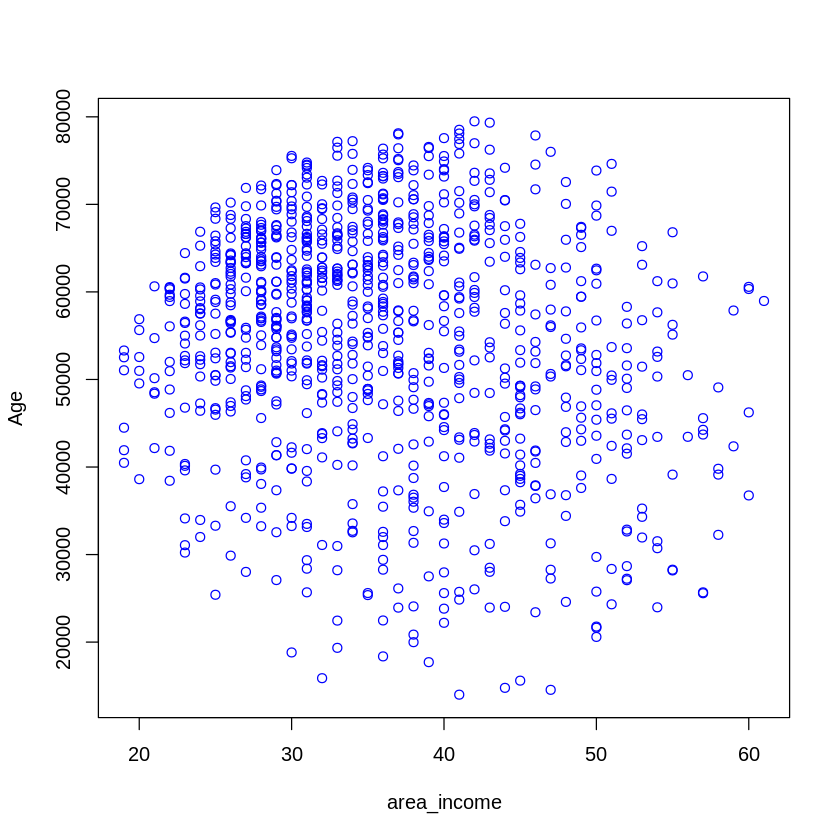

In [99]:
plot(age, Areaincome, xlab="area_income", ylab="Age", col= 'blue')

#high income is within the age 20-40

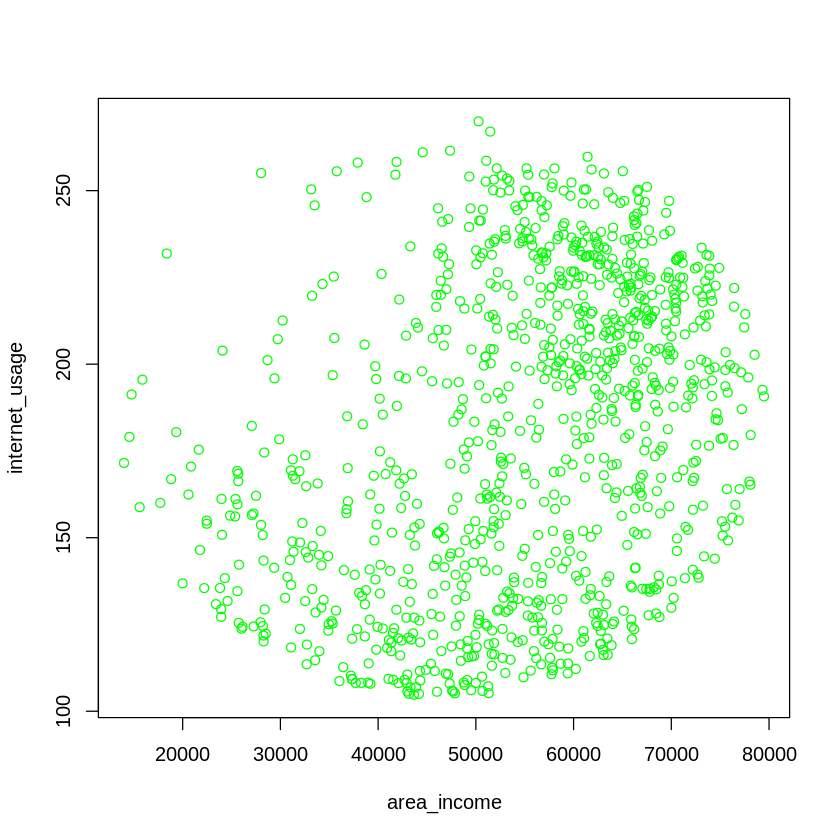

In [102]:
plot(Areaincome, internet_usage, xlab="area_income", ylab="internet_usage", col= 'green')

#internet usage is very low for people with low levels of income, this explains the positive linear relationship,
#as income increases people are using more internet

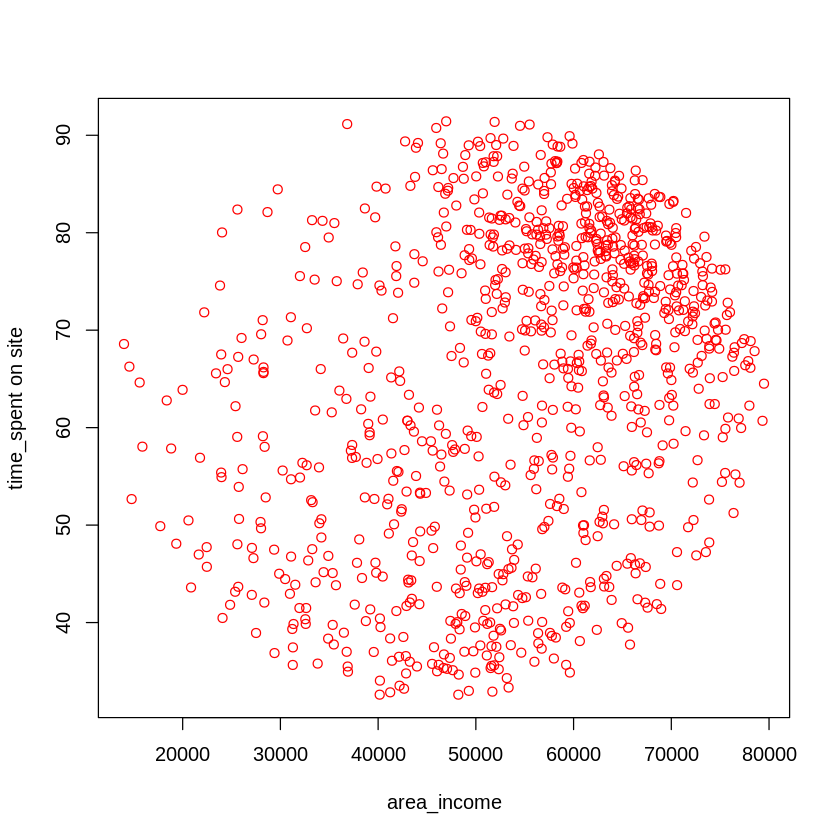

In [104]:
plot(Areaincome, time_spent_site, xlab="area_income", ylab="time_spent on site", col= 'red')

#time spent on the site is high for those earning high incomes.

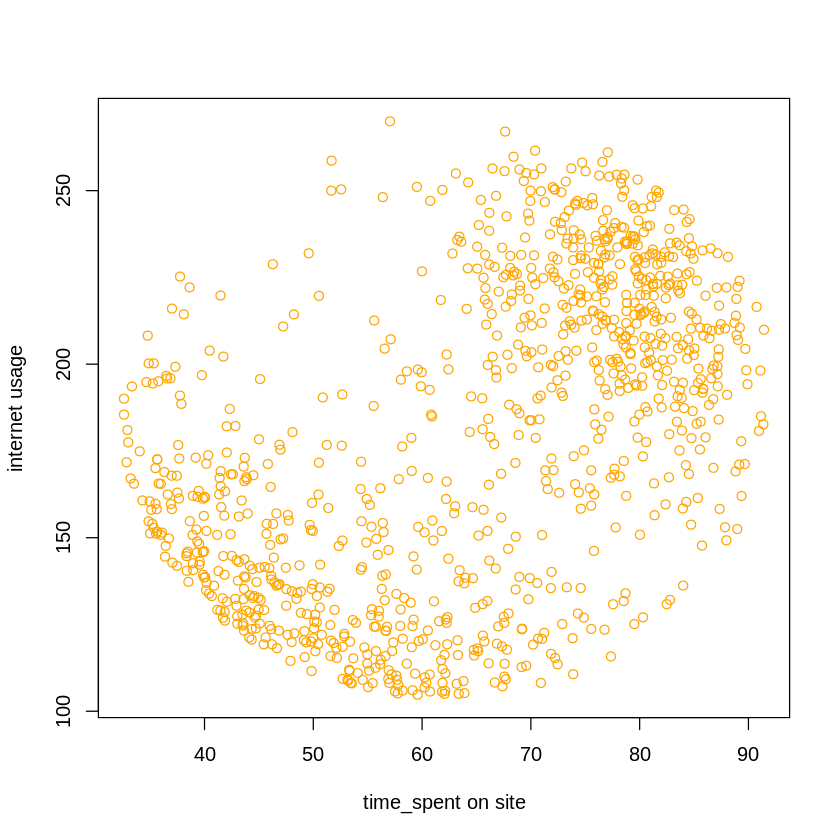

In [105]:
plot(time_spent_site, internet_usage, xlab="time_spent on site", ylab="internet usage", col= 'orange')

#time spent on the site increases internet usage as shown below, the more the time someone spents on site the more the daily internet usage

##Solution

In [107]:
head(adverts)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [110]:
#importing ggplot library
library(ggplot2)

In [120]:
#renaming our column to variable
clicked_ad <- adverts[['Clicked on Ad']]

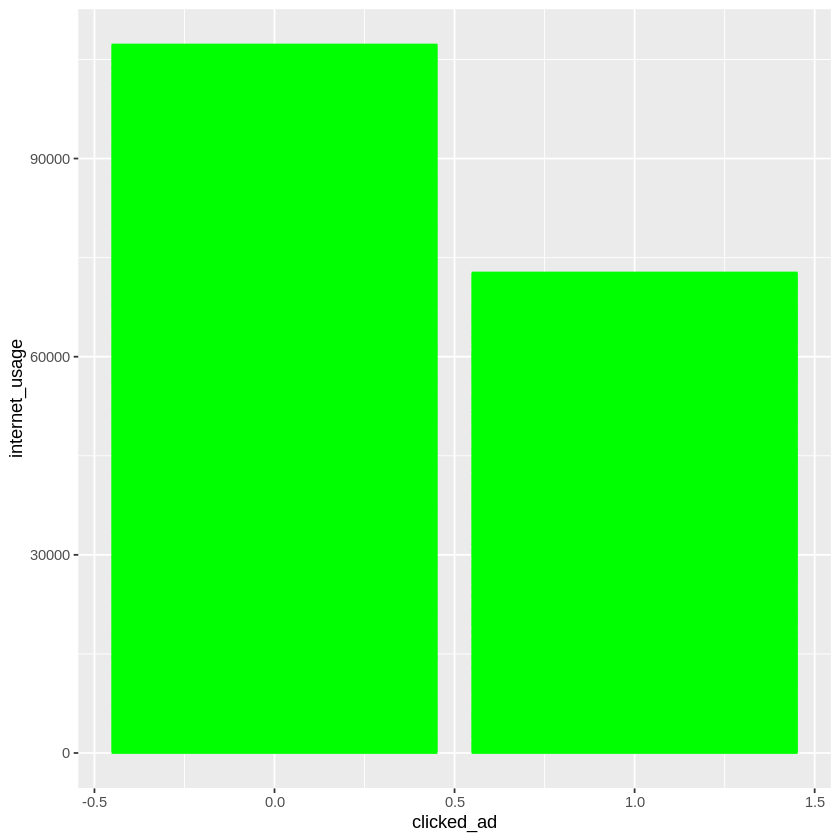

In [122]:
# Barplot for the internet usage vs clicks on add

ggplot(adverts, aes(x=clicked_ad, y=internet_usage)) + 
  geom_bar(col= 'green', stat = "identity")

#assuming is clicked on ad and 1 is did not click on ad
#a high internet usage has more click on ads

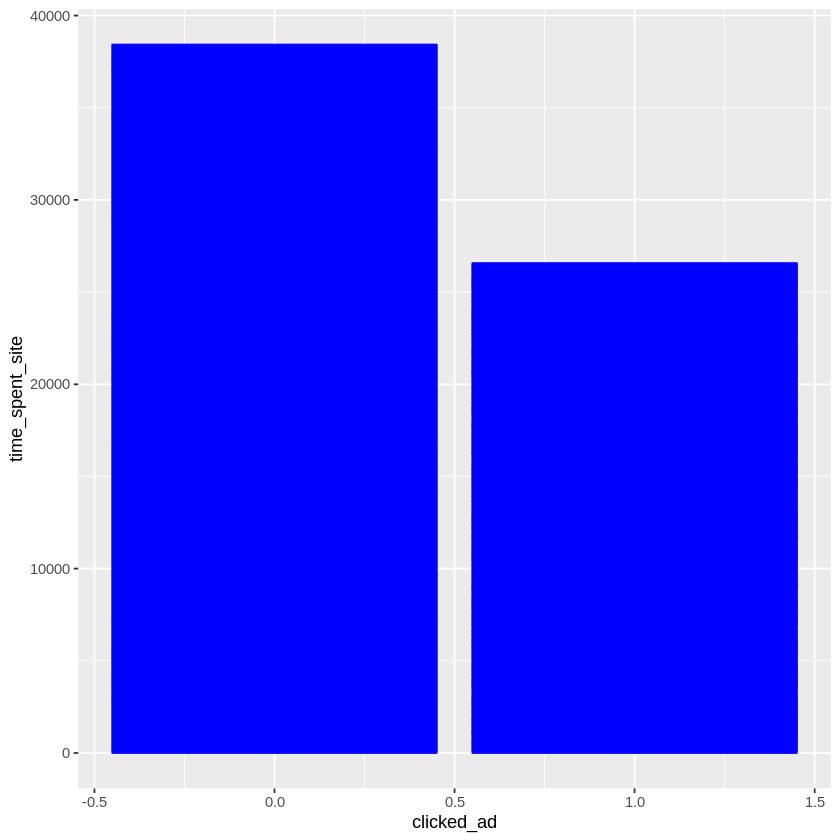

In [123]:
# Barplot for time spent on site vs clicks on ads

ggplot(adverts, aes(x=clicked_ad, y=time_spent_site)) + 
  geom_bar(col= 'blue', stat = "identity")

#alot of time spent on site resulted to more clicks on adds

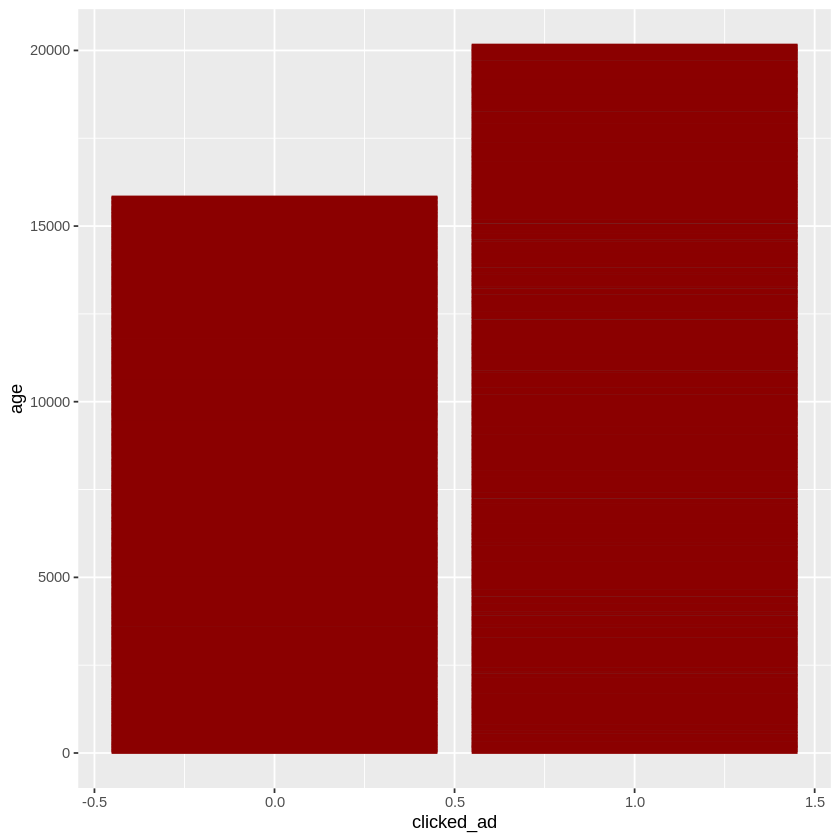

In [124]:
# Barplot for age vs clicks on ads

ggplot(adverts, aes(x=clicked_ad, y=age)) + 
  geom_bar(col= 'darkred', stat = "identity")

#the people with less years tend to click on ads unlike the older ones

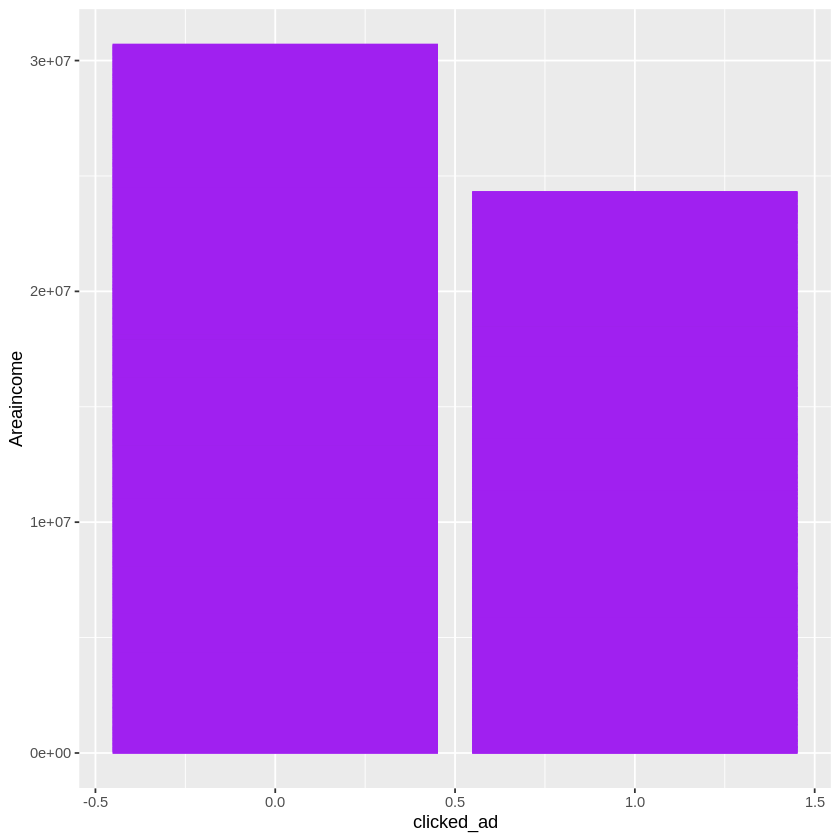

In [125]:
# Barplot area income vs clicked ads

ggplot(adverts, aes(x=clicked_ad, y=Areaincome)) + 
  geom_bar(col= 'purple', stat = "identity")

#more income increases clicks on add, this would be because with more income there is high internet usage and more time spent on site per day

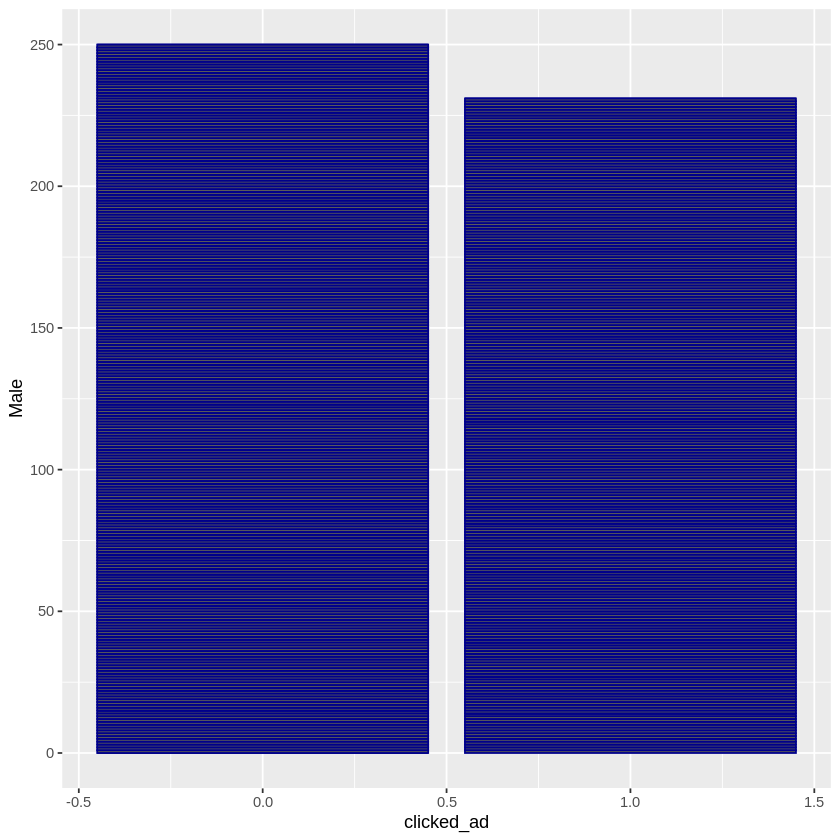

In [126]:
# Barplot gender vs clicked ads

ggplot(adverts, aes(x=clicked_ad, y=Male)) + 
  geom_bar(col= 'darkblue', stat = "identity")

#there is no huge difference in terms of gender on who clicked ads

the factors that are affecting whether links are clicked or not are the age, daily internet usage, area income as well as time spent on site.
Therefore we can say that people with age between 20-40 are spending more time on the internet since they also earn more income as seen and have high internet usageas well in the analysis. this are therefore the persons who clicked on ads oftenly.

##Recommendations

we would recomend on adding links when there is a high traffic on site as more people on sight might increase clicks on adds.
another thing wuld be to study the time of day or day of week with highest traffick on site and utilize that.